# 1. Frame the Problem

The Bank Indessa has not done well in last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.

After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them. 

In this challenge, you will help this bank by predicting the probability that a member will default

## Importing Libraries

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms
import numpy as np

# 2. Obtain Data

In [2]:
data = pd.read_csv('train_indessa.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

In [4]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [5]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


# 3. Analyze Data

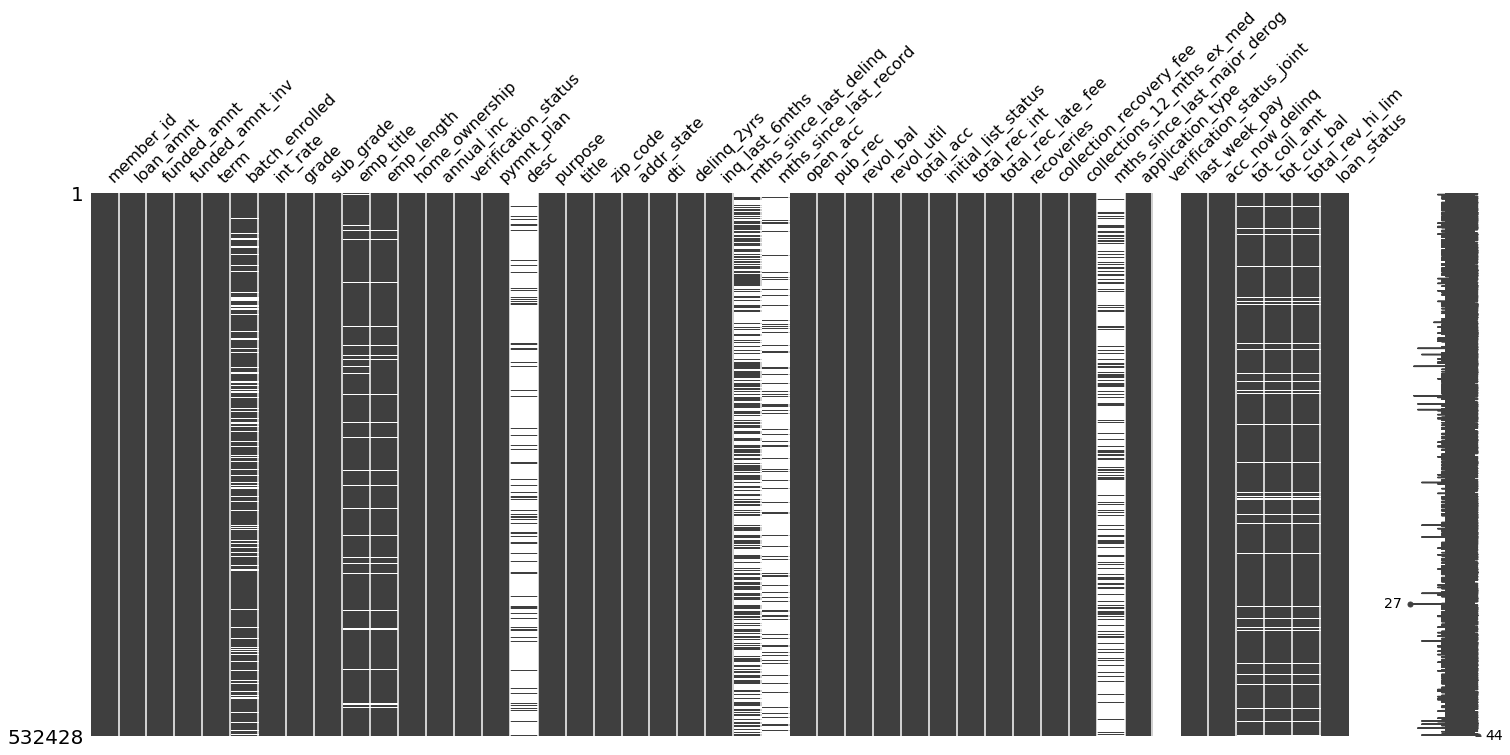

In [6]:
ms.matrix(data)

In [7]:
data.loc[0:20, ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'loan_status']]

,loan_amnt,funded_amnt,funded_amnt_inv,loan_status
0,14350,14350,14350.0,0
1,4800,4800,4800.0,0
2,10000,10000,10000.0,0
3,15000,15000,15000.0,0
4,16000,16000,16000.0,0
5,15000,15000,14950.0,0
6,5000,5000,4975.0,1
7,6000,6000,6000.0,0
8,6000,6000,6000.0,0
9,34550,34550,34550.0,0


In [8]:
check = data['funded_amnt'] == data['loan_amnt']

In [9]:
data.loc[check[check == False].index].loan_status.value_counts()

1    934
0    318
Name: loan_status, dtype: int64

In [10]:
pd.concat([data.loc[check[check == False].index].loan_amnt - data.loc[check[check == False].index].funded_amnt, data.loc[check[check == False].index].loan_status], axis = 1)

,0,loan_status
909,7725,1
973,5775,0
2952,2375,1
3046,9400,0
3151,1500,1
4507,5850,1
4968,7500,1
5825,5900,0
5984,13175,1
6145,5725,1


In [11]:
data['term'].value_counts()

36 months    372793
60 months    159635
Name: term, dtype: int64

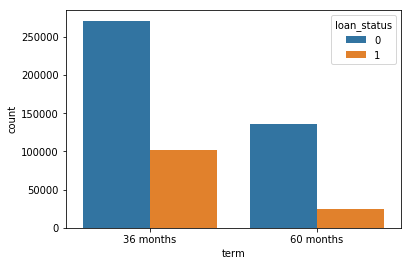

In [12]:
sns.countplot(x = data['term'], hue = data['loan_status'], data = data)

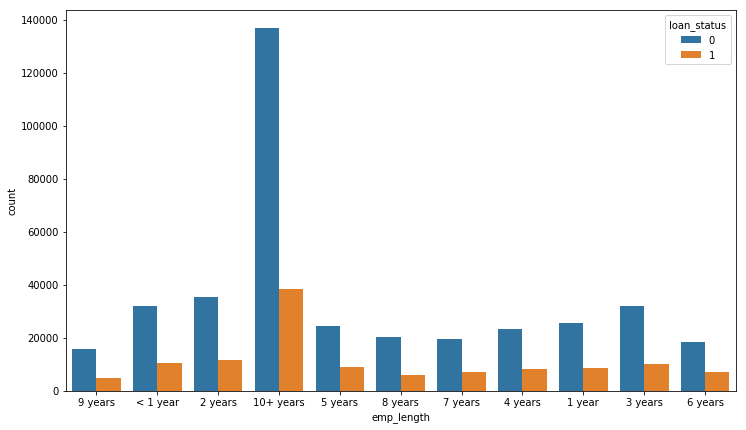

In [13]:
plt.figure(figsize=(12, 7))
sns.countplot(x = data['emp_length'], hue = data['loan_status'], data = data)

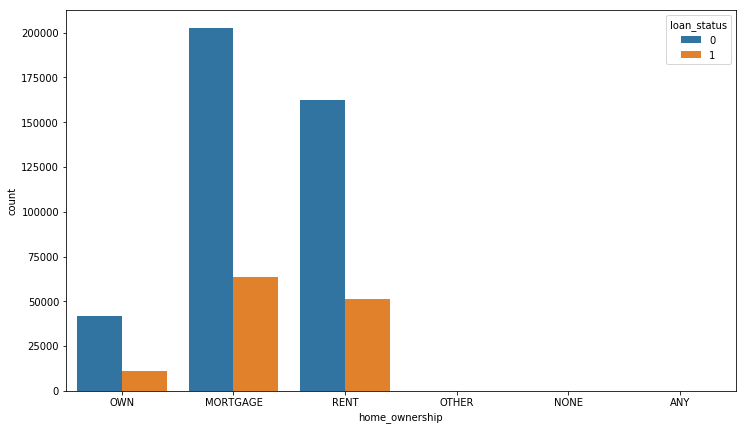

In [14]:
plt.figure(figsize=(12, 7))
sns.countplot(x = data['home_ownership'], hue = data['loan_status'], data = data)

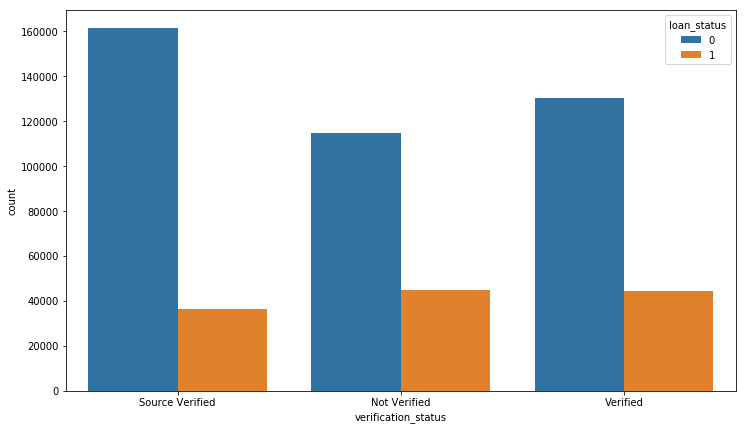

In [15]:
plt.figure(figsize=(12, 7))
sns.countplot(x = data['verification_status'], hue = data['loan_status'], data = data)

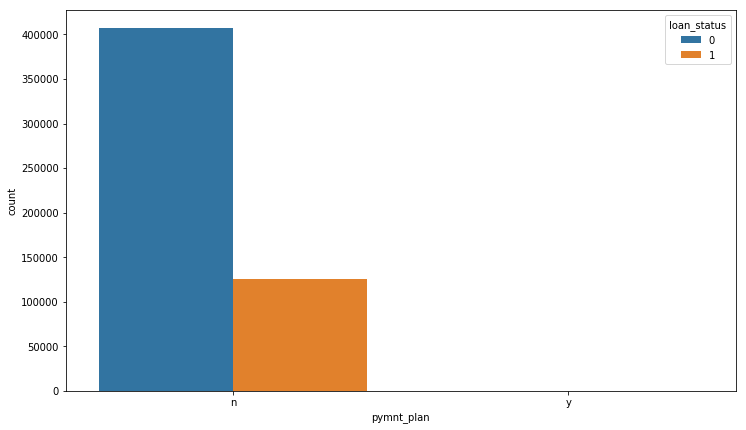

In [16]:
plt.figure(figsize=(12, 7))
sns.countplot(x = data['pymnt_plan'], hue = data['loan_status'], data = data)

In [17]:
data.purpose.value_counts()

debt_consolidation    314989
credit_card           123670
home_improvement       31087
other                  25652
major_purchase         10284
small_business          6146
car                     5266
medical                 5117
moving                  3243
vacation                2812
house                   2170
wedding                 1401
renewable_energy         331
educational              260
Name: purpose, dtype: int64

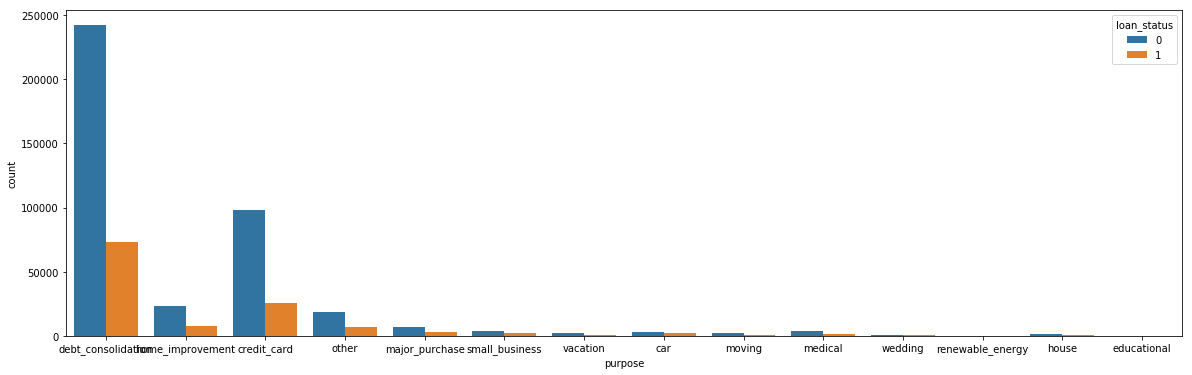

In [18]:
plt.figure(figsize=(20, 6))
sns.countplot(x = data['purpose'], hue = data['loan_status'], data = data)

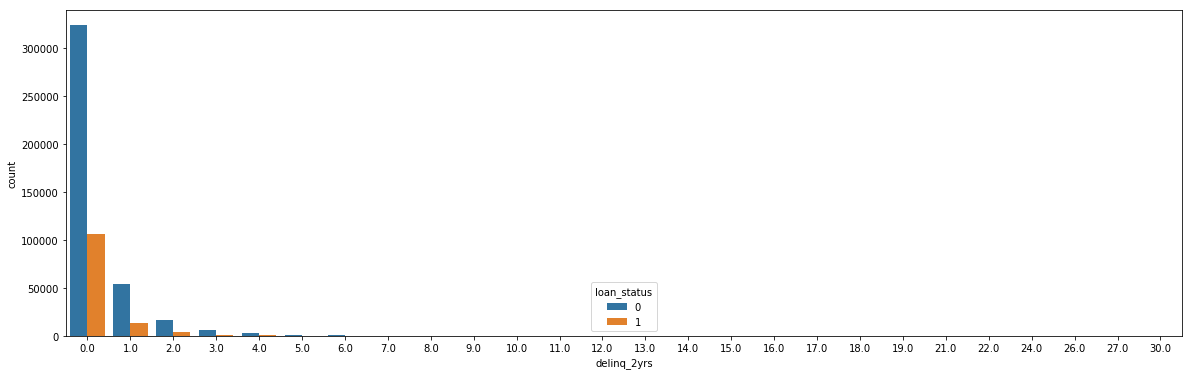

In [19]:
plt.figure(figsize=(20, 6))
sns.countplot(x = data['delinq_2yrs'], hue = data['loan_status'], data = data)

In [20]:
data['addr_state'].value_counts()

CA    77911
NY    44406
TX    42527
FL    36575
IL    21205
NJ    20103
PA    18882
OH    17778
GA    17292
VA    15826
NC    14812
MI    13869
MD    12667
MA    12385
AZ    12320
WA    11664
CO    11233
MN     9577
MO     8538
IN     8197
CT     8075
TN     7817
NV     7408
WI     6880
AL     6699
OR     6549
SC     6331
LA     6304
KY     5140
KS     4818
OK     4797
AR     3988
UT     3829
NM     2958
HI     2705
WV     2615
NH     2568
RI     2322
MS     2296
MT     1545
DE     1512
DC     1477
AK     1346
WY     1198
SD     1091
VT     1062
NE      709
ME      324
ND      284
IA        7
ID        7
Name: addr_state, dtype: int64

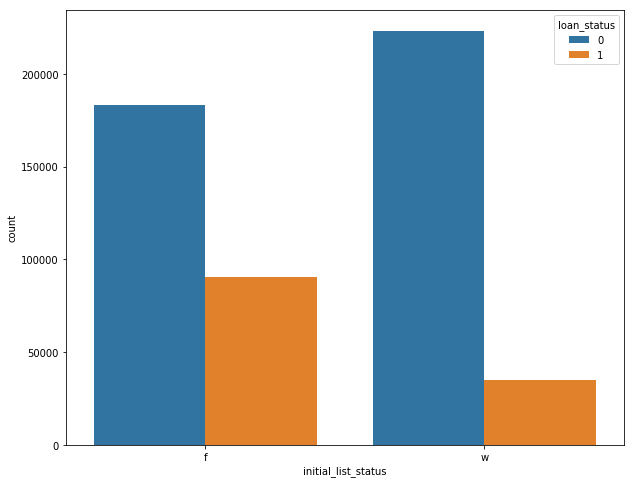

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(x = data['initial_list_status'], hue = data['loan_status'], data = data)

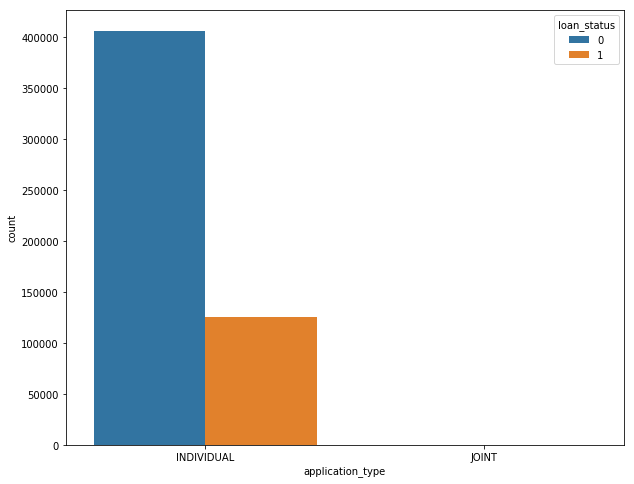

In [22]:
plt.figure(figsize=(10, 8))
sns.countplot(x = data['application_type'], hue = data['loan_status'], data = data)

In [23]:
data.loc[data['application_type'] == 'JOINT'].loan_status.value_counts()

0    304
1      1
Name: loan_status, dtype: int64

In [24]:
data['application_type'].value_counts()

INDIVIDUAL    532123
JOINT            305
Name: application_type, dtype: int64

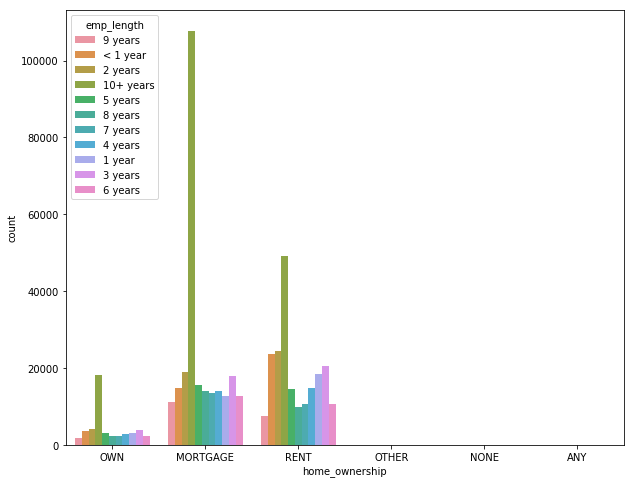

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(x = data['home_ownership'], hue = data['emp_length'], data = data)

In [26]:
data['last_week_pay'].value_counts()

13th week     30333
9th week      28626
26th week     27475
22th week     26000
4th week      25704
35th week     24037
39th week     23796
17th week     22036
31th week     21437
52th week     19391
65th week     19231
48th week     19104
61th week     18082
78th week     14130
74th week     13407
87th week     11333
91th week     10759
NAth week     10614
44th week     10433
83th week      9817
70th week      9605
156th week     8504
100th week     8309
43th week      8159
109th week     7838
57th week      7828
104th week     7703
96th week      6810
113th week     6533
117th week     6463
              ...  
222th week      183
200th week      180
204th week      171
226th week      167
231th week      148
235th week      137
244th week      130
239th week      129
248th week      124
252th week      117
169th week      104
256th week       82
79th week        81
182th week       34
243th week       28
153th week       25
192th week       18
230th week       17
257th week       11


In [27]:
data['delinq_2yrs'].value_counts()

0.0     430104
1.0      67947
2.0      20167
3.0       7269
4.0       3159
5.0       1622
6.0        898
7.0        451
8.0        266
9.0        166
10.0       116
11.0        73
12.0        61
13.0        37
14.0        28
15.0        14
16.0         9
18.0         8
17.0         6
19.0         4
21.0         2
30.0         1
22.0         1
26.0         1
27.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

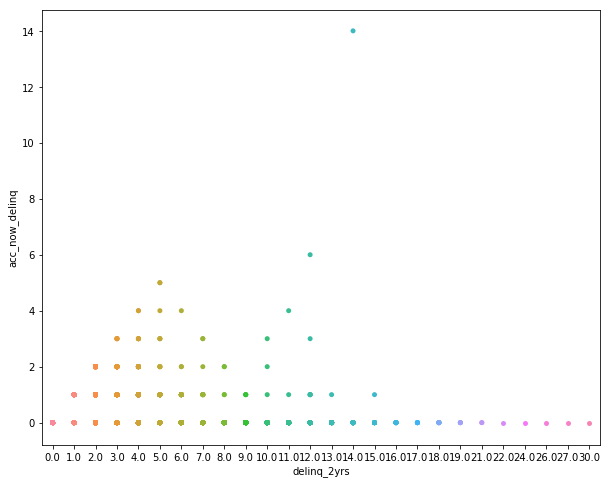

In [28]:
plt.figure(figsize=(10, 8))
sns.stripplot(x = data['delinq_2yrs'], y = data['acc_now_delinq'], data = data)

# 4. Feature Engineering

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

### Converting objects to numericals

In [32]:
def convert_last_week_pay(col):
    num = col[:col.find('th')]
    if(num == 'NA'):
        return np.nan
    return int(num)

In [33]:
data['last_week_pay'] = data['last_week_pay'].apply(convert_last_week_pay)

In [34]:
data['term'] = data['term'].map({'36 months':3, '60 months': 5})

### Filling Missing Values

In [35]:
def fill_missings_train(df):
    df['emp_length'].fillna('10+ years', inplace = True)
    df['mths_since_last_delinq'].fillna(34.0, inplace = True)
    df['revol_util'].fillna(55.0, inplace = True)
    df['collections_12_mths_ex_med'].fillna(0.0, inplace = True)
#     df['mths_since_last_major_derog'].fillna(df['mths_since_last_major_derog'].mean, inplace = True)
    df['tot_coll_amt'].fillna(0.0, inplace = True)
    df['tot_cur_bal'].fillna(0.0, inplace = True)
    df['total_rev_hi_lim'].fillna(32080.57, inplace = True)
    df['last_week_pay'].fillna(58.0, inplace = True)

### Adding New Columns

In [36]:
def add_new_columns(data):
    data['SI'] = data['funded_amnt'] * data['term'] * data['int_rate'] / 100
    data['disappointment'] = (data['loan_amnt'] == data['funded_amnt']).apply(int)
    data['capability'] = data['loan_amnt'] / data['annual_inc']

In [37]:
add_new_columns(data)

### Categorical Value Conversion

In [38]:
def convert_columns(data):
    term_df = pd.get_dummies(data['term'], drop_first = True)
#     emp_length_df = pd.get_dummies(data['emp_length'], drop_first = True)
    home_ownership_df = pd.get_dummies(data['home_ownership'], drop_first = True)
    verification_status_df = pd.get_dummies(data['verification_status'], drop_first = True)
    purpose_df = pd.get_dummies(data['purpose'], drop_first = True)
    initial_list_status_df = pd.get_dummies(data['initial_list_status'], drop_first = True)
    application = pd.get_dummies(data['application_type'], drop_first = True)
    data.drop(['batch_enrolled', 'grade', 'sub_grade', 'emp_title', 'pymnt_plan', 'desc', 'title', 'zip_code', 'addr_state', 'mths_since_last_record', 'mths_since_last_major_derog', 'verification_status_joint'], inplace = True, axis = 1)
    data.drop(['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type'], inplace = True, axis = 1)
    data = pd.concat([data, term_df, home_ownership_df, verification_status_df, purpose_df, initial_list_status_df, application], axis = 1)
    return data

In [39]:
data = convert_columns(data)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 51 columns):
member_id                     532428 non-null int64
loan_amnt                     532428 non-null int64
funded_amnt                   532428 non-null int64
funded_amnt_inv               532428 non-null float64
int_rate                      532428 non-null float64
annual_inc                    532425 non-null float64
dti                           532428 non-null float64
delinq_2yrs                   532412 non-null float64
inq_last_6mths                532412 non-null float64
mths_since_last_delinq        259874 non-null float64
open_acc                      532412 non-null float64
pub_rec                       532412 non-null float64
revol_bal                     532428 non-null float64
revol_util                    532141 non-null float64
total_acc                     532412 non-null float64
total_rec_int                 532428 non-null float64
total_rec_late_fee            5

In [41]:
data.dropna(inplace = True)

# 5. Model Selection

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['loan_status'], axis = 1), data['loan_status'], random_state = 42, test_size = 0.2)

In [44]:
X_train.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,w,JOINT
261302,45461424,23825,23825,23825.0,14.65,90000.0,14.45,1.0,0.0,18.0,...,0,0,0,0,0,0,0,0,0,0
480983,26467679,9175,9175,9175.0,16.99,42000.0,23.83,0.0,5.0,52.0,...,0,0,0,0,0,0,0,0,0,0
311900,64351938,18000,18000,18000.0,8.18,54000.0,17.56,0.0,0.0,57.0,...,0,0,0,0,0,0,0,0,0,0
271108,70781042,10000,10000,10000.0,12.59,62000.0,20.02,1.0,2.0,10.0,...,0,0,0,0,0,0,0,0,1,0
127630,53352938,28000,28000,28000.0,20.99,85000.0,18.75,3.0,2.0,12.0,...,0,0,0,0,0,0,0,0,1,0


## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
predict = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, predict)

array([[38715,   227],
       [ 8427,   475]], dtype=int64)

In [49]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [50]:
precision_score(y_test, predict)

0.6766381766381766

In [51]:
recall_score(y_test, predict)

0.05335879577623006

## Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
predict = model.predict(X_test)

In [55]:
confusion_matrix(y_test, predict)

array([[38145,   797],
       [ 3943,  4959]], dtype=int64)

In [56]:
precision_score(y_test, predict)

0.8615357887421821

In [57]:
recall_score(y_test, predict)

0.5570658279038418

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:
predict = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, predict)

In [ ]:
precision_score(y_test, predict)

In [ ]:
recall_score(y_test, predict)

# 6. Tuning the Model

In [61]:
from sklearn.grid_search import GridSearchCV

C:\Users\Dell\Anaconda3\envs\mlw\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dell\Anaconda3\envs\mlw\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Random Forest Classifier

In [89]:
param_grid = [
    {'n_estimators': [101, 200]},
    {'n_jobs': [-1]},
    ]

In [90]:
model = RandomForestClassifier()

In [95]:
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'precision', verbose = 4)

In [96]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=101 ................................................
[CV] ....................... n_estimators=101, score=0.870515 - 1.6min
[CV] n_estimators=101 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ....................... n_estimators=101, score=0.877852 - 1.6min
[CV] n_estimators=101 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


[CV] ....................... n_estimators=101, score=0.866538 - 1.6min
[CV] n_estimators=101 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.8min remaining:    0.0s


[CV] ....................... n_estimators=101, score=0.871326 - 1.6min
[CV] n_estimators=101 ................................................
[CV] ....................... n_estimators=101, score=0.871542 - 1.6min
[CV] n_estimators=200 ................................................
[CV] ....................... n_estimators=200, score=0.872896 - 3.1min
[CV] n_estimators=200 ................................................
[CV] ....................... n_estimators=200, score=0.877448 - 3.1min
[CV] n_estimators=200 ................................................
[CV] ....................... n_estimators=200, score=0.863792 - 3.1min
[CV] n_estimators=200 ................................................
[CV] ....................... n_estimators=200, score=0.870892 - 3.1min
[CV] n_estimators=200 ................................................
[CV] ....................... n_estimators=200, score=0.871336 - 2.3min
[CV] n_jobs=-1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 23.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [101, 200]}, {'n_jobs': [-1]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='precision', verbose=4)

In [101]:
grid_search.best_params_

{'n_estimators': 101}

In [102]:
print(confusion_matrix(y_test, predict))

[[38145   797]
 [ 3943  4959]]


In [103]:
print(precision_score(y_test,predict))

0.8615357887421821


In [104]:
print(recall_score(y_test,predict))

0.5570658279038418


# 7. Predict on New Cases

In [ ]:
test = pd.read_csv('test_indessa.csv')

In [ ]:
test.info()

In [ ]:
test['last_week_pay'] = test['last_week_pay'].apply(convert_last_week_pay)

In [ ]:
test['term'] = test['term'].map({'36 months':3, '60 months': 5})

In [ ]:
fill_missings_train(test)

In [ ]:
test['annual_inc'].fillna(65000.0, inplace = True)
test['delinq_2yrs'].fillna(0.0, inplace = True)
test['inq_last_6mths'].fillna(0.0, inplace = True)
test['open_acc'].fillna(11.0, inplace = True)
test['pub_rec'].fillna(0.0, inplace = True)
test['total_acc'].fillna(24.0, inplace = True)
test['acc_now_delinq'].fillna(0.0, inplace = True)

In [ ]:
add_new_columns(test)

In [ ]:
test = convert_columns(test)

In [ ]:
test['MORTGAGE'] = np.zeros(test.shape[0])

In [ ]:
cols = data.columns.tolist()
cols.remove('loan_status')
test = test[cols]

In [ ]:
model = XGBClassifier()
model.fit(data.drop(['loan_status'], axis = 1), data['loan_status'])

In [ ]:
test_predict = model.predict_proba(test)

In [ ]:
result = pd.concat([test['member_id'], pd.DataFrame(test_predict, columns = ['loan', 'loan_status'])], axis = 1)
result.drop(['loan'], axis = 1, inplace = True)

In [ ]:
result.to_csv('result.csv', index = False)